<a href="https://colab.research.google.com/github/mrcmento/ml/blob/master/mnist_benford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from os import path, getcwd, chdir
import matplotlib.pyplot as plt
import numpy as np
from math import log10
from collections import Counter

path = f"{getcwd()}/mnist.npz"

deviationsL1 = []
deviationsL2 = []

In [ ]:
def benford_dist(title, s, out_file, deviations):
    expected = [log10(1+1/d) for d in range(1,10)]
    c = Counter(s)
    size = sum(c.values())
    res = [c[d]/size for d in range(1,10)]
    result = ''
    totalDiff = 0
    for r, e in zip(res, expected):
        totalDiff += abs(r - e)*100.
        result += ("%5.1f%% %5.1f%%  %5.1f%%" % (r*100., e*100., abs(r - e)*100.))
        result += '\n'
    result += '\n'
    deviations.append(totalDiff)
    out_file.write('total_diff: ' + str(totalDiff) + '\n')
    out_file.write("\n%s Benfords deviation\n" % title)
    out_file.write(result)

In [ ]:
fLayer1 = open("benfordLayer1.txt","w+")
fLayer2 = open("benfordLayer2.txt","w+")

In [ ]:
def write_benford_and_metrics(out_file, layer_number, epoch, logs, deviations):
    header = 'epoch ' + str(epoch) + ' accuracy ' + str(logs.get('accuracy')) + ' loss ' + str(logs.get('loss')) \
           + ' val_accuracy ' + str(logs.get('val_accuracy')) + ' val_loss ' + str(logs.get('val_loss')) + '\n'
    out_file.write(header)
    weights, biases = model.layers[layer_number].get_weights()
    weights_str = np.array(weights,dtype=str) #i was too lazy to find a better way to get the first no zero digit
    flat_weights_str = np.array(weights_str).ravel() #flatten
    flat_weights_str = [x if x[0] != '-' else x[1:] for x in flat_weights_str] #strip negativ sign
    flat_weights_str = [x.replace('.', '').lstrip('0')[0] for x in flat_weights_str] # throw away decimal dot and stip leading zeros
    benford_dist('Glorot', np.array(flat_weights_str,dtype=int), out_file, deviations)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    write_benford_and_metrics(fLayer1, 1, epoch, logs, deviationsL1)
    write_benford_and_metrics(fLayer2, 2, epoch, logs, deviationsL2)

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)
x_train = x_train/255.0
x_test = x_test/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, callbacks=[myCallback()])

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3100 - accuracy: 0.9126 - val_loss: 0.1729 - val_accuracy: 0.9498
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1486 - accuracy: 0.9576 - val_loss: 0.1258 - val_accuracy: 0.9652
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1065 - accuracy: 0.9692 - val_loss: 0.1077 - val_accuracy: 0.9670
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0834 - accuracy: 0.9755 - val_loss: 0.0961 - val_accuracy: 0.9708
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0668 - accuracy: 0.9796 - val_loss: 0.0881 - val_accuracy: 0.9734
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0555 - accuracy: 0.9831 - val_loss: 0.0925 - val_accuracy: 0.9715
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0472 - accuracy: 0.9853 - val_loss: 0.0894 - val_accuracy:

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

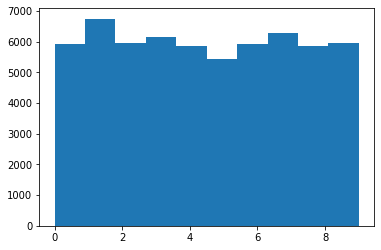

In [ ]:
plt.hist(y_train)

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1313 - accuracy: 0.9767


[0.131261944770813, 0.9767000079154968]

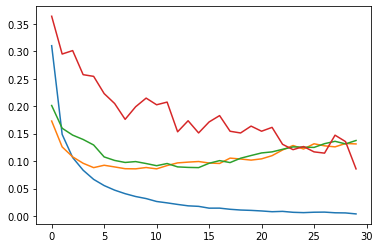

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(np.array(deviationsL1)/100) # otherwise scales are too off
plt.plot(np.array(deviationsL2)/100) # otherwise scales are too off

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# i know just for scripting...
fLayer1.close()
fLayer2.close()